# **Exploración de datos y descripción**

**Descripción:**
Visión general de los datos y exploración para comprobar los tipos de datos y solucionar cualquier problema con los tipos de datos.
Esto es para hacer un correcto análisis y visualización de los datos.

📚 **Importar librerías**

In [1]:
# base libraries for data science
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa

💾 **Carga de datos**

In [2]:
# path del directorio del datset
BASE_DIR = Path("/home/lof/Projects/Telco-Customer-Churn")
DATA_DIR = BASE_DIR / "data" / "raw"
file_path = DATA_DIR / "churn_raw.csv"

churn_df = pd.read_csv(file_path)

📊 **Descripción del dataset**

In [3]:
# Ajustar la configuración para mostrar todas las columnas
pd.set_option("display.max_columns", None)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24742 entries, 0 to 24741
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MonthlyCharges    24527 non-null  float64
 1   data_source       24739 non-null  object 
 2   StreamingMovies   24415 non-null  object 
 3   Partner           24639 non-null  object 
 4   value             24739 non-null  float64
 5   PhoneService      24527 non-null  object 
 6   InternetService   24445 non-null  object 
 7   StreamingTV       24375 non-null  object 
 8   OnlineSecurity    24393 non-null  object 
 9   MultipleLines     24493 non-null  object 
 10  Dependents        24585 non-null  object 
 11  DeviceProtection  24383 non-null  object 
 12  SeniorCitizen     24636 non-null  float64
 13  TotalCharges      24601 non-null  object 
 14  TechSupport       24379 non-null  object 
 15  gender            24684 non-null  object 
 16  PaperlessBilling  24504 non-null  object

In [4]:
churn_df.sample(10)

MonthlyCharges data_source      StreamingMovies Partner     value  \
8270            40.70       other                   No      No  151642.0   
2690            74.25       other                   No      No  151642.0   
17683           74.75       other                  Yes      No  151642.0   
14971          113.20       other                  Yes      No  151642.0   
5019            45.15       other                   No      No  151642.0   
22540           80.45       other                   No      No  151642.0   
671             19.35       other  No internet service      No  151642.0   
10915           60.05       other                   No     Yes  151642.0   
16512           53.75       other                   No      No  151642.0   
11972           19.40       other  No internet service      No  151642.0   

      PhoneService InternetService          StreamingTV       OnlineSecurity  \
8270            No             DSL                   No                  Yes   
2690           Yes     Fiber optic                   No                   No   
17683          Yes             DSL                  Yes                  Yes   
14971          Yes     Fiber optic                  Yes                  Yes   
5019           Yes             DSL                   No                   No   
22540          Yes     Fiber optic                   No                   No   
671            Yes              No  No internet service  No internet service   
10915          Yes             DSL                   No                   No   
16512          Yes             DSL                   No                   No   
11972          Yes              No  No internet service  No internet service   

          MultipleLines Dependents     DeviceProtection  SeniorCitizen  \
8270   No phone service         No                  Yes            0.0   
2690                Yes         No                   No            0.0   
17683                No         No                   No            1.0   
14971               Yes         No                  Yes            0.0   
5019                 No         No                   No            0.0   
22540               Yes         No                   No            1.0   
671                  No         No  No internet service            0.0   
10915               Yes        Yes                   No            0.0   
16512                No         No                   No            0.0   
11972                No         No  No internet service            0.0   

      TotalCharges          TechSupport gender  PaperlessBilling  tenure  \
8270         449.3                   No  Female               No    10.0   
2690         74.25                   No    Male              Yes     1.0   
17683       2111.3                   No    Male              Yes    30.0   
14971      3914.05                  Yes  Female              Yes    35.0   
5019        416.45                   No  Female               No     9.0   
22540      5224.35                   No  Female              Yes    66.0   
671         433.75  No internet service  Female              Yes    20.0   
10915      1616.15                  Yes  Female              Yes    26.0   
16512       648.65                  Yes    Male              Yes    12.0   
11972         19.4  No internet service  Female               No     1.0   

      Churn         OnlineBackup              PaymentMethod        Contract  \
8270     No                  Yes  Bank transfer (automatic)  Month-to-month   
2690    Yes                   No               Mailed check  Month-to-month   
17683    No                  Yes           Electronic check  Month-to-month   
14971    No                  Yes               Mailed check        Two year   
5019    Yes                   No           Electronic check  Month-to-month   
22540   Yes                  Yes    Credit card (automatic)  Month-to-month   
671      No  No internet service    Credit card (automatic)        One year   
10915

**Valores nulos**

In [5]:
nans = ["NA", "N/A", "null", "NULL", "nan", "NaN", "", " ", "?"]
for col in churn_df.columns:
    if len(churn_df[churn_df[col].isin(nans)]) > 0:
        print(f"Weird Nan representation found for column {col}")

Weird Nan representation found for column TotalCharges


In [6]:
def porcentaje_nulos(df, columna):
    return df[columna].isnull().mean() * 100


for col in churn_df.columns:
    porcentaje = porcentaje_nulos(churn_df, col)
    print(f"El {porcentaje:.2f}% de los valores en '{col}' son nulos.")

El 0.87% de los valores en 'MonthlyCharges' son nulos.
El 0.01% de los valores en 'data_source' son nulos.
El 1.32% de los valores en 'StreamingMovies' son nulos.
El 0.42% de los valores en 'Partner' son nulos.
El 0.01% de los valores en 'value' son nulos.
El 0.87% de los valores en 'PhoneService' son nulos.
El 1.20% de los valores en 'InternetService' son nulos.
El 1.48% de los valores en 'StreamingTV' son nulos.
El 1.41% de los valores en 'OnlineSecurity' son nulos.
El 1.01% de los valores en 'MultipleLines' son nulos.
El 0.63% de los valores en 'Dependents' son nulos.
El 1.45% de los valores en 'DeviceProtection' son nulos.
El 0.43% de los valores en 'SeniorCitizen' son nulos.
El 0.57% de los valores en 'TotalCharges' son nulos.
El 1.47% de los valores en 'TechSupport' son nulos.
El 0.23% de los valores en 'gender ' son nulos.
El 0.96% de los valores en 'PaperlessBilling' son nulos.
El 0.73% de los valores en 'tenure' son nulos.
El 0.69% de los valores en 'Churn' son nulos.
El 1.49%

No hay un número de valores nulos representativos dentro de las columnas para descartar una de ellas

In [7]:
def reemplazar_nulos(df):
    valores_nulos = ["NA", "N/A", "null", "NULL", "nan", "NaN", "", " ", "?"]
    return df.replace(valores_nulos, np.nan)


churn_df = reemplazar_nulos(churn_df)

In [8]:
churn_df["data_source"].unique()

array(['other', nan], dtype=object)

In [9]:
churn_df["value"].unique()

array([151642.,     nan])

**Columnas removidas**

Tenía sospechas de que la columna 'data_source' y 'value 'tenían un único valor para todos sus registros y eran ciertas mis sospechas, por lo tanto son las siguientes columnas que vamos a descartar.

La columna 'customerID' es una cadena que es única para cada cliente, pero es sólo un identificador, por lo que la eliminaremos.

In [10]:
churn_df = churn_df.drop(columns=["data_source", "customerID", "value"])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24742 entries, 0 to 24741
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MonthlyCharges    24527 non-null  float64
 1   StreamingMovies   24415 non-null  object 
 2   Partner           24639 non-null  object 
 3   PhoneService      24527 non-null  object 
 4   InternetService   24445 non-null  object 
 5   StreamingTV       24375 non-null  object 
 6   OnlineSecurity    24393 non-null  object 
 7   MultipleLines     24493 non-null  object 
 8   Dependents        24585 non-null  object 
 9   DeviceProtection  24383 non-null  object 
 10  SeniorCitizen     24636 non-null  float64
 11  TotalCharges      24560 non-null  object 
 12  TechSupport       24379 non-null  object 
 13  gender            24684 non-null  object 
 14  PaperlessBilling  24504 non-null  object 
 15  tenure            24562 non-null  float64
 16  Churn             24571 non-null  object

**Variables categóricas**

**Ordinales**
   - Ninguna variable es categórica ordinal

**Nominales**
   - gender: Si el cliente es 'Masculino' o 'Femenino'
   - MultipleLines: Si el cliente tiene múltiples líneas o no (Sí, No, Sin servicio telefónico)
   - InternetService: Proveedor de servicio de internet del cliente (DSL, Fibra óptica, No)
   - OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de internet)
   - DeviceProtection: Si el cliente tiene protección para su dispositivo o no (Sí, No, Sin servicio de internet)
   - TechSupport: Si el cliente tiene soporte técnico o no (Sí, No, Sin servicio de internet)
   - StreamingTV: Si el cliente tiene servicio de TV en streaming o no (Sí, No, Sin servicio de internet)
   - StreamingMovies: Si el cliente tiene servicio de películas en streaming o no (Sí, No, Sin servicio de internet)
   - Contract: Tipo de contrato del cliente (Mes a mes, Un año, Dos años)
   - PaymentMethod: Método de pago del cliente (Cheque electrónico, Cheque por correo, Transferencia bancaria (automática), Tarjeta de crédito)
   - OnlineBackup: Si el cliente dispone o no de copia de seguridad (Sí, No, Sin servicio de Internet)

---

**Variables numéricas**

**Discretas**
   - tenure: Número de meses que el cliente ha permanecido con la empresa

**Continuas**
   - MonthlyCharges: Monto cobrado al cliente mensualmente
   - TotalCharges: Monto total cobrado al cliente

---

**Variables booleanas**
   - SeniorCitizen: Si el cliente es un ciudadano mayor o no (1, 0)
   - Partner: Si el cliente tiene pareja o no (Sí, No)
   - Dependents: Si el cliente tiene dependientes o no (Sí, No)
   - PhoneService: Si el cliente tiene servicio telefónico o no (Sí, No)
   - PaperlessBilling: Si el cliente usa facturación electrónica o no (Sí, No)
   - Churn: Si el cliente canceló el servicio o no (Sí, No)

---

**Variables de tipo string**
   - No hay variables de solo texto en estos momentos


In [11]:
cols_categoric = [
    "StreamingMovies",
    "InternetService",
    "StreamingTV",
    "OnlineSecurity",
    "MultipleLines",
    "DeviceProtection",
    "TechSupport",
    "gender ",
    "OnlineBackup",
    "PaymentMethod",
    "Contract",
]
churn_df[cols_categoric] = churn_df[cols_categoric].astype("category")

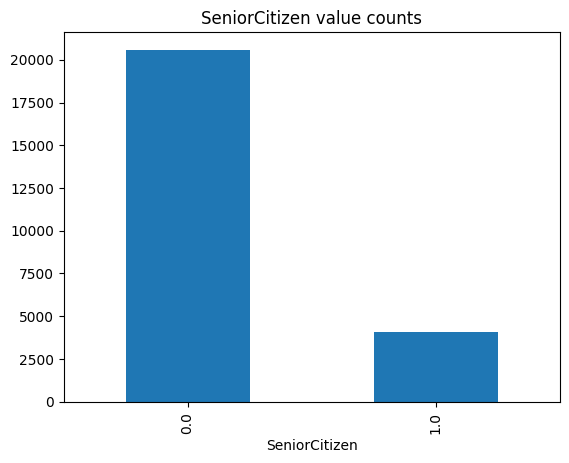

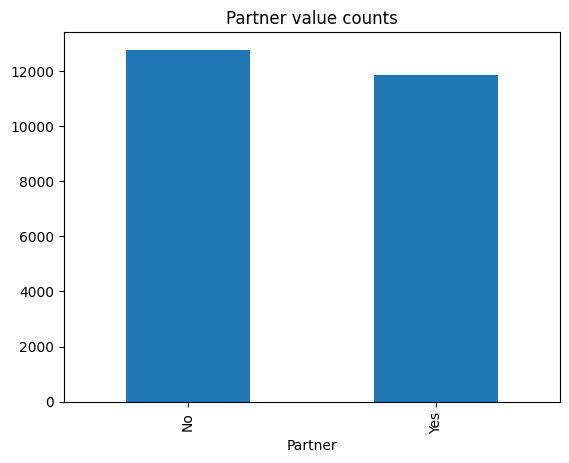

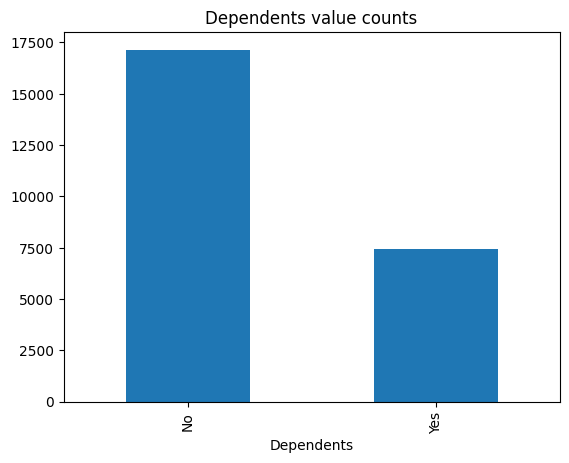

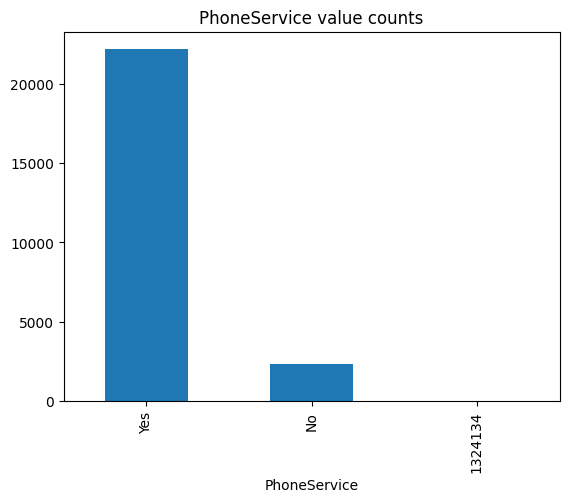

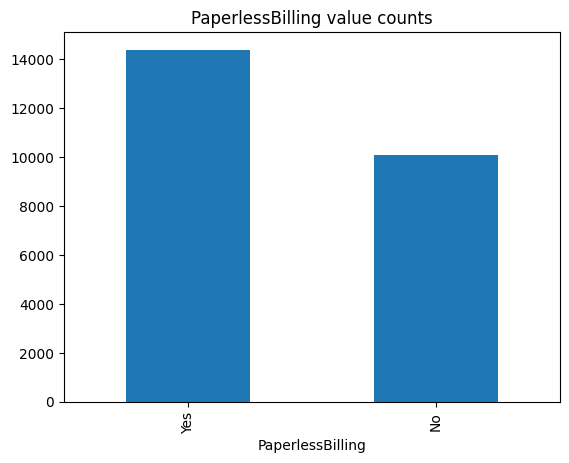

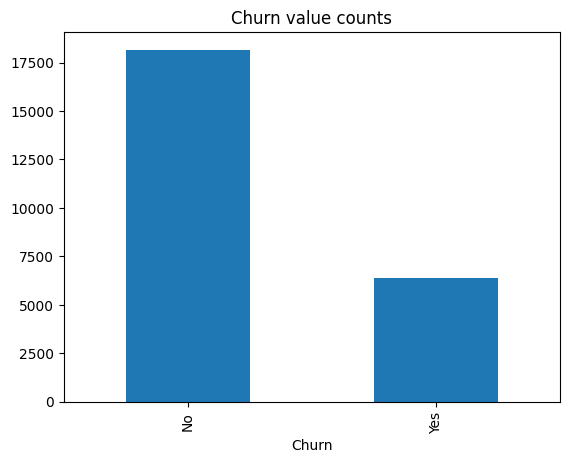

In [12]:
cols_boolean = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
    "Churn",
]
for col in cols_boolean:
    churn_df[col].value_counts().plot(kind="bar", title=f"{col} value counts")
    plt.show()

In [13]:
churn_df["PhoneService"] = churn_df["PhoneService"].replace("1324134", np.nan)
cols_boolean = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in cols_boolean:
    churn_df[col] = churn_df[col].map({"Yes": 1, "No": 0})

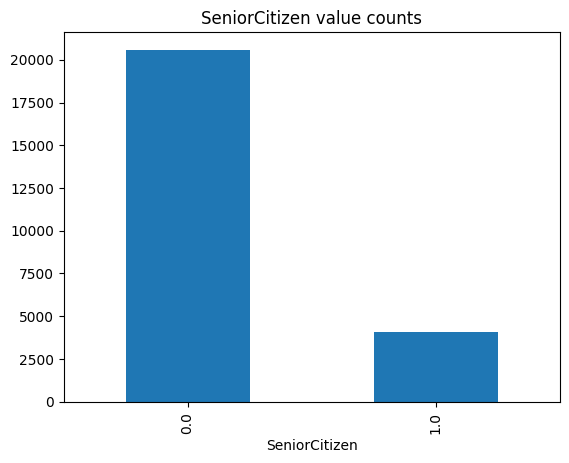

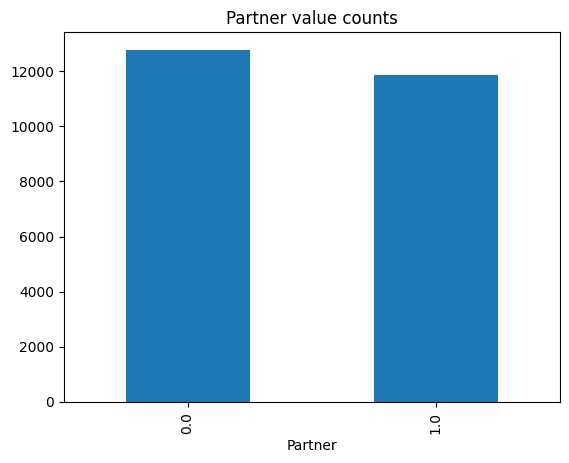

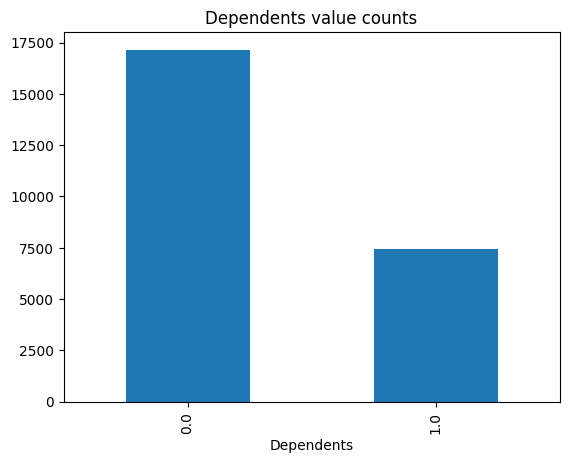

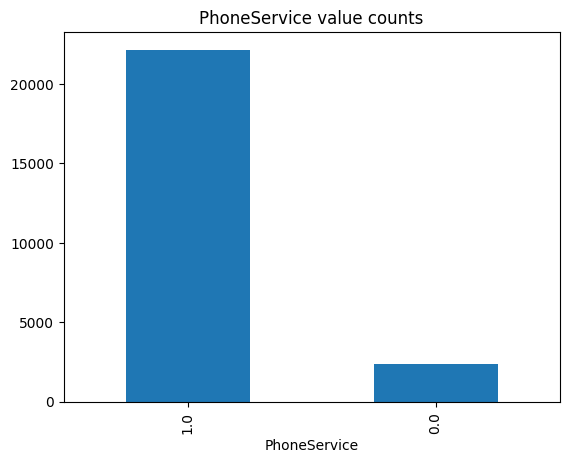

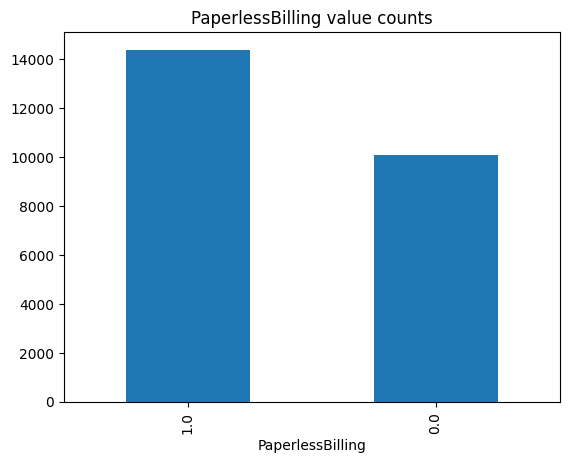

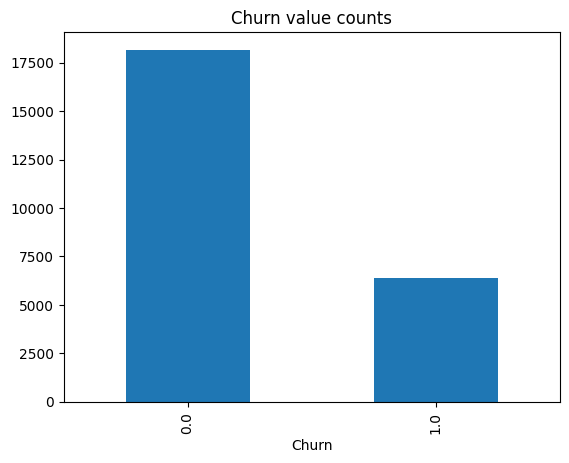

In [14]:
cols_boolean = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
    "Churn",
]
for col in cols_boolean:
    churn_df[col].value_counts().plot(kind="bar", title=f"{col} value counts")
    plt.show()

In [15]:
cols_boolean = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
    "Churn",
]
churn_df[cols_boolean] = churn_df[cols_boolean].astype("category")

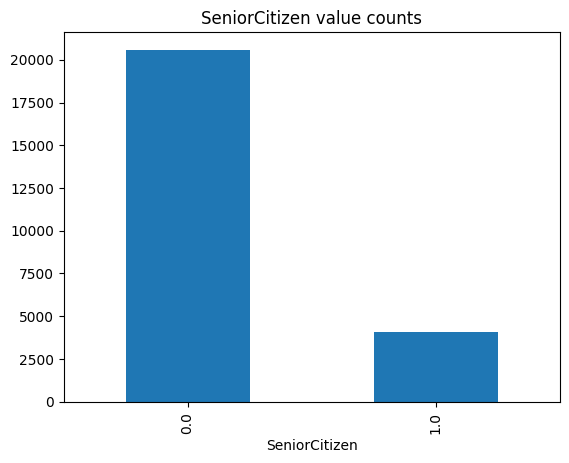

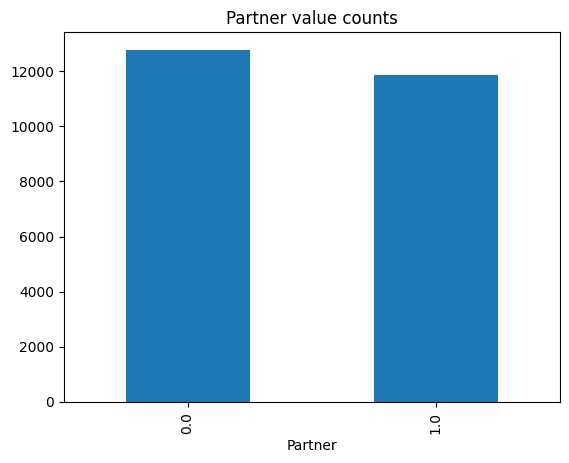

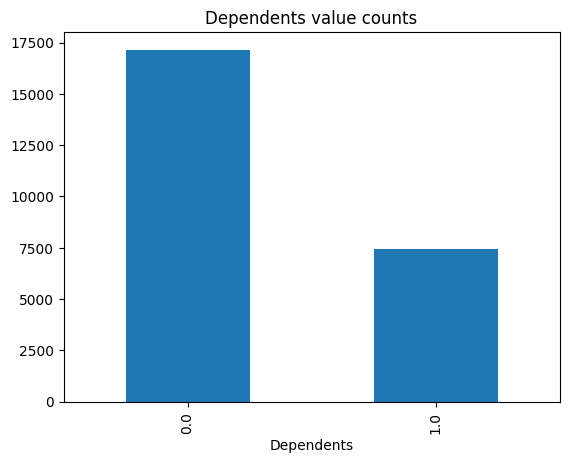

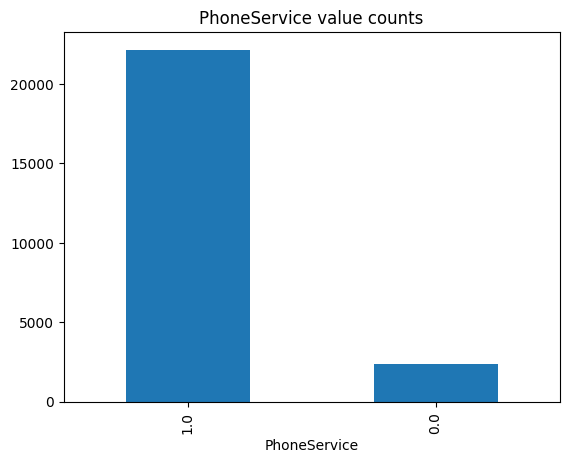

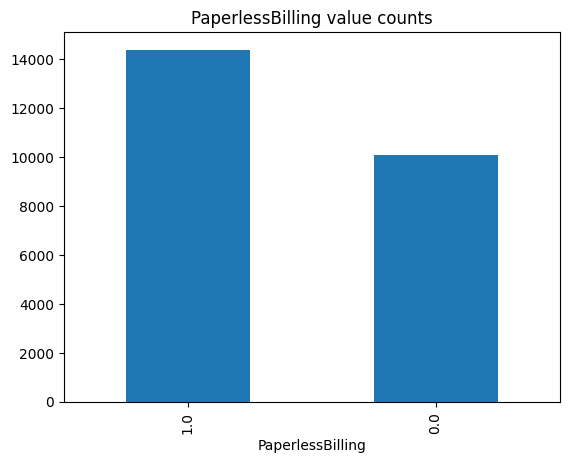

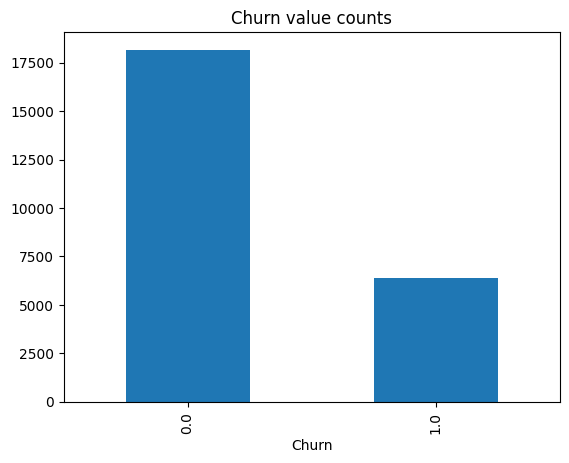

In [16]:
cat_cols = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in cat_cols:
    churn_df[col].value_counts().plot(kind="bar", title=f"{col} value counts")
    plt.show()

In [17]:
cols_numeric_float = ["MonthlyCharges", "TotalCharges"]
churn_df[cols_numeric_float] = churn_df[cols_numeric_float].astype("float")

In [ ]:
# Esta columna posee valores np.nan por lo que la convertiremos en int en
# otro momento donde hayamos tratado los nulos
cols_numeric_float = ["tenure"]
churn_df[cols_numeric_float] = churn_df[cols_numeric_float].astype("float")

In [19]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24742 entries, 0 to 24741
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MonthlyCharges    24527 non-null  float64 
 1   StreamingMovies   24415 non-null  category
 2   Partner           24639 non-null  category
 3   PhoneService      24525 non-null  category
 4   InternetService   24445 non-null  category
 5   StreamingTV       24375 non-null  category
 6   OnlineSecurity    24393 non-null  category
 7   MultipleLines     24493 non-null  category
 8   Dependents        24585 non-null  category
 9   DeviceProtection  24383 non-null  category
 10  SeniorCitizen     24636 non-null  category
 11  TotalCharges      24560 non-null  float64 
 12  TechSupport       24379 non-null  category
 13  gender            24684 non-null  category
 14  PaperlessBilling  24504 non-null  category
 15  tenure            24562 non-null  float64 
 16  Churn             2457

In [20]:
schema = pa.Table.from_pandas(churn_df).schema

In [21]:
DATA_DIR = BASE_DIR / "data" / "interim"
churn_df.to_parquet(DATA_DIR / "churn_type_fixed.parquet", index=False, schema=schema)

Se han eliminado algunas columnas y se han corregido los data types para corregir los tipos de datos de pyarrow. y los valores nulos se han sustituido por np.nan para poder hacer un correcto análisis y visualización de los datos.


📖 **Referencias**
 - https://pandas.pydata.org/docs/user_guide/pyarrow.html